# Feature Selection

*notebook ini digunakan untuk mengexplore metode-metode feature selection*

- filtering method
- wrapped method
- embedding method

## Import Library

In [80]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
import category_encoders as ce

## Load Dataset

In [81]:
# columns = ["Car_ID", "Symboling", "carCompany", "fueltype", "aspiration", "doornumber", 
#            "carbody", "drivewheel", "enginelocation", "wheelbase", "carlength", "carwidth", 
#            "carheight", "curbweight", "enginetype", "cylindernumber", "enginesize", "fuelsystem", 
#            "boreratioHH23", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", 
#            "highwaympg", "price"]

In [82]:
raw_df = pd.read_csv('D:\\NIDS-2023\\Tugas\\CarPrice_Assignment.csv')
raw_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [83]:
raw_df.shape

(205, 26)

In [84]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Cleaning

In [85]:
df = raw_df.copy()

In [86]:
# checking null value
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [87]:
# checking duplicate value
df.duplicated().sum()

# show duplicated row
df[df.duplicated(keep=False)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [88]:
# drop unused column ('car_ID' and 'symboling')
df = df.drop(['car_ID', 'CarName'], axis=1)

## Profiling Descriptive Statistics

In [89]:
desc_df = df.drop('price', axis=1)

In [90]:
# features
desc_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [91]:
desc_df.describe(include=object)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205
unique,2,2,2,5,3,2,7,7,8
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,185,168,115,96,120,202,148,159,94


In [92]:
df[['price']].describe()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


## Filtering Method Feature Selection

In [55]:
# numeric df
numeric_df = df.select_dtypes(include=np.number).drop(columns=['symboling'])

# categorical feature
categorical_df = df.select_dtypes(include=['object'])
categorical_df['symboling'] = df['symboling']
categorical_df['price'] = df['price']

# target
target_df = df[['price']]

In [56]:
encoder = ce.OrdinalEncoder(cols=['fueltype', 'aspiration', 'doornumber', 'carbody', 
                                  'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 
                                  'fuelsystem'])

# Fit and transform the encoder on your DataFrame
categorical_df_encoded = encoder.fit_transform(categorical_df)

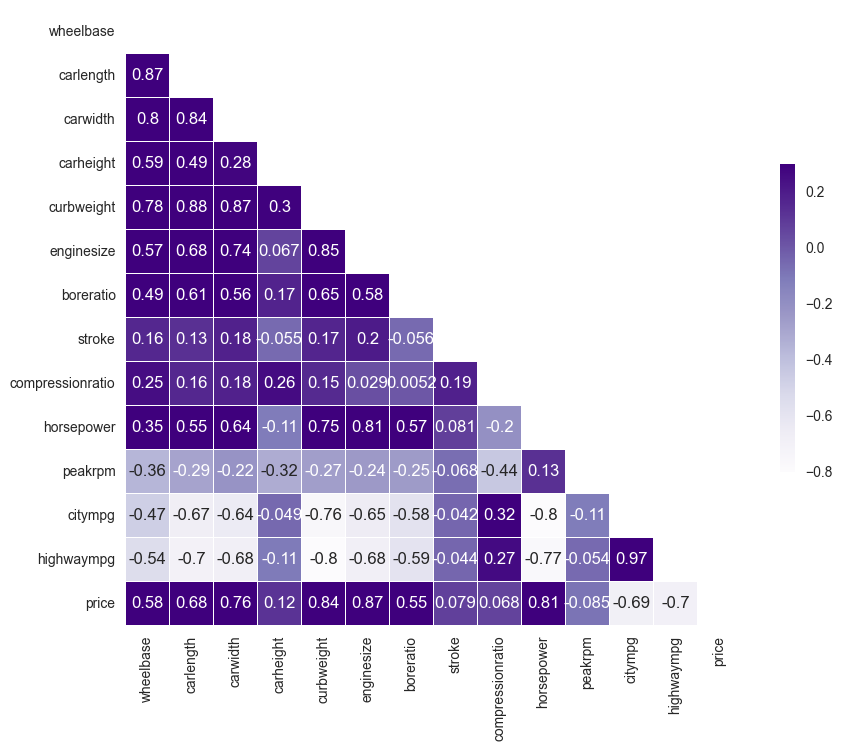

In [64]:
# Correlation with pearson
num_corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(num_corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.color_palette('Purples', as_cmap=True)

with sns.axes_style('white'):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(num_corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [67]:
# Extract the correlation values with the target variable
correlation_with_price = num_corr['price'].abs().sort_values(ascending=False)

# Select the top k features based on correlation
k = 6
selected_features = correlation_with_price.head(k).index

# Filter the DataFrame to keep only the selected features
num_df_selected = df[selected_features]
num_df_selected

,price,enginesize,curbweight,horsepower,carwidth,highwaympg
0,13495.0,130,2548,111,64.1,27
1,16500.0,130,2548,111,64.1,27
2,16500.0,152,2823,154,65.5,26
3,13950.0,109,2337,102,66.2,30
4,17450.0,136,2824,115,66.4,22
...,...,...,...,...,...,...
200,16845.0,141,2952,114,68.9,28
201,19045.0,141,3049,160,68.8,25
202,21485.0,173,3012,134,68.9,23
203,22470.0,145,3217,106,68.9,27


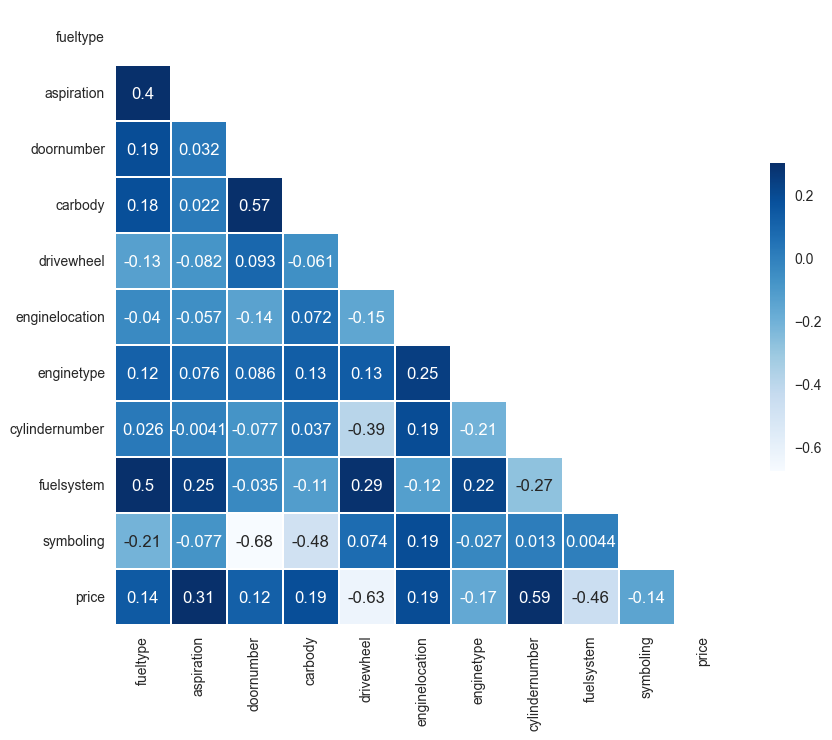

In [65]:
# Correlation with spearman rank
cat_corr = categorical_df_encoded.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cat_corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.color_palette('Blues', as_cmap=True)

with sns.axes_style('white'):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(cat_corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [68]:
# Extract the correlation values with the target variable
correlation_with_price = cat_corr['price'].abs().sort_values(ascending=False)

# Select the top k features based on correlation
k = 6
selected_features = correlation_with_price.head(k).index

# Filter the DataFrame to keep only the selected features
cat_df_selected = df[selected_features]
cat_df_selected

,price,drivewheel,cylindernumber,fuelsystem,aspiration,enginelocation
0,13495.0,rwd,four,mpfi,std,front
1,16500.0,rwd,four,mpfi,std,front
2,16500.0,rwd,six,mpfi,std,front
3,13950.0,fwd,four,mpfi,std,front
4,17450.0,4wd,five,mpfi,std,front
...,...,...,...,...,...,...
200,16845.0,rwd,four,mpfi,std,front
201,19045.0,rwd,four,mpfi,turbo,front
202,21485.0,rwd,six,mpfi,std,front
203,22470.0,rwd,six,idi,turbo,front
